In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f as f_distribution
from TE import TE

In [19]:
class M:
    alfa = None
    mu = None
    st = None
    P = None
    S = None
    a = None
    n = None


class Y:
    z = None
    thr = None
    FP = None

In [20]:
def t2t(X):
    alfa = 0.95
    limvar = 0.95

    n, m = X.shape
    mu = np.mean(X, axis=0)
    st = np.std(X, axis=0)

    X = X - mu
    X = X / st

    _, S, v = np.linalg.svd(np.cov(X, rowvar=False))

    sd = S
    sst = np.sum(sd)
    sd = sd / sst
    ss = sd[0]

    a = 0

    while ss < limvar:
        a = a + 1
        ss = ss + sd[a]

    P = v[:, 0:(a + 1)]
    r = np.dot(X, (np.eye(m) - np.dot(P, P.T.conj())))

    M.alfa = alfa
    M.mu = mu
    M.st = st
    M.P = P
    M.S = np.diag(S)
    M.a = a
    M.n = n

    if a < m:
        M.r_var = np.var(r)
    else:
        M.r_var = []

    return M



In [21]:
def t2s(y, M):
    II = len(y)
    n, m = y.shape
    y = y - M.mu
    y = y / M.st

    D = np.linalg.multi_dot([M.P, np.linalg.inv(M.S[0:(M.a + 1), 0:(M.a + 1)]), (M.P.T.conj())])

    F = D
    limiar = (M.a * (M.n - 1) * (M.n + 1) / (M.n * (M.n - M.a))) * f_distribution.ppf(M.alfa, M.a, M.n - M.a)

    z = []

    for i in range(n):
        yn = y[i, :]

        z.append(np.linalg.multi_dot([yn, F, yn.T.conj()]))

    Y.z = z
    Y.thr = limiar

    #FP = 100 * sum(Y.z[0:II] > Y.thr) / II
    #Y.FP = FP;

    return Y

In [22]:
def pca_contribution(x, M):
    T = np.dot(x, M.P)

    (m, c) = M.P.shape

    ctr = np.zeros(m)
    idx = []

    t2 = (M.a * (M.n - 1) * (M.n + 1) / (M.n * (M.n - M.a))) * f_distribution.ppf(M.alfa, M.a, M.n - M.a)

    for j in range(c):
        if ((T[j] / np.sqrt(M.S[j, j])) ** 2) > ((1 / M.a) * t2):
            idx.append(j)

    cont = [];
    c = len(idx);

    if c > 0:
        for i in range(c):
            for j in range(m):
                tn = idx[i]
                ti = T[tn]
                pij = M.P[j, tn]
                aux = (ti / M.S[tn, tn]) * pij * x[j]

                if (len(cont) - 1) < i:
                    cont.append([])
                if aux > 0:
                    cont[i].append(aux)
                else:
                    cont[i].append(0)


        if c > 1:
            cont = np.sum(cont, axis=0)
        else:
            cont = np.asarray(cont).flatten()

        ctr = cont / np.sum(cont)

    return ctr


In [23]:
def contribution(x, M):
    C = []
    n, m = x.shape
    x = x - M.mu

    for i in range(n):
        C.append(pca_contribution(x[i, :], M))

    C = np.array(C)
    # for i in range(C.shape[1]):
        # plt.plot(C[:,i])
        # plt.axhline(Y.thr, color='k', linestyle='-', linewidth=2)
        # plt.show()

    return C

In [24]:
def plot_threshold(Y):
    plt.plot(np.c_[Y.z, np.ones(len(Y.z)) * Y.thr])
    plt.axhline(Y.thr, color='k', linestyle='-', linewidth=2)
    plt.show()

In [25]:
X = np.random.randn(200, 3)
X[100:200, 1] = X[100:200, 1] + 5

M = t2t(X[0:99, :])
Y = t2s(X, M)

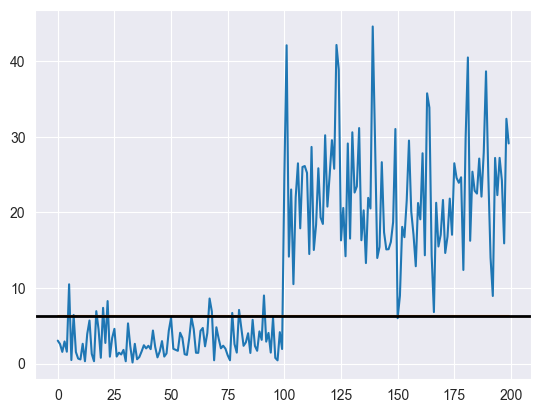

In [26]:
plot_threshold(Y)

In [27]:
contribution(X[95:105, :], M);
#xline(5,'Color','r');

In [28]:
from TE import TE

te = TE()
te.rootdir = 'te/'
te.datadir = te.rootdir
fault_num = '01'

te.read_train_test_pair(fault_num=fault_num, standardize=False)

trainingdata = te.Xtrain
testdata = te.Xtest

In [29]:
M=t2t(testdata[0:99,:])
Y =t2s(testdata[100:200,:],M);

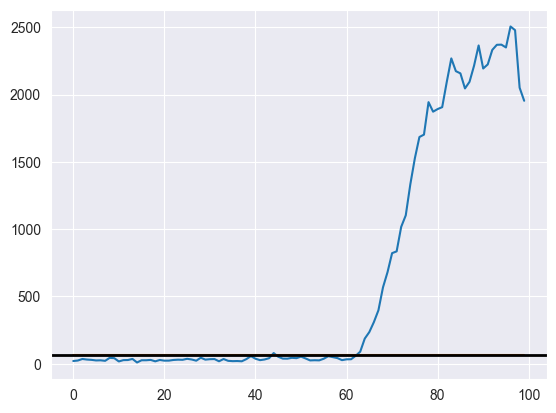

In [30]:
plot_threshold(Y)

In [31]:
C = contribution(testdata[155:165, :], M);

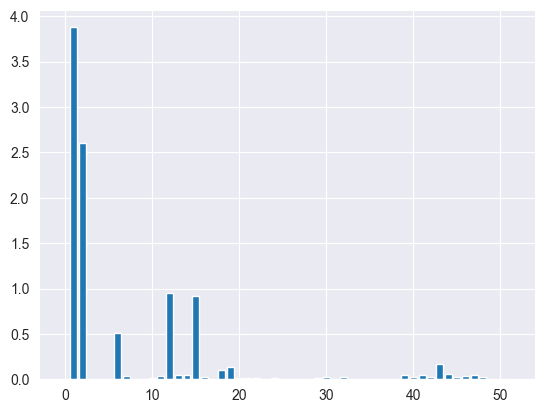

In [32]:
plt.bar([i for i in range(52)], np.sum(C, axis=0))
plt.show()

      values  variables
1   3.877826        1.0
2   2.599067        2.0
12  0.955277       12.0
15  0.918968       15.0
6   0.514114        6.0
43  0.166226       43.0
19  0.132309       19.0
18  0.103018       18.0
44  0.058998       44.0
47  0.051352       47.0
13  0.050148       13.0
41  0.048562       41.0
14  0.048153       14.0
39  0.047459       39.0
46  0.041095       46.0
11  0.031867       11.0
7   0.031574        7.0
16  0.030404       16.0
30  0.026835       30.0
45  0.026477       45.0
40  0.024143       40.0
42  0.023276       42.0
48  0.022089       48.0
32  0.021386       32.0
22  0.018936       22.0
20  0.014741       20.0
24  0.013431       24.0
21  0.011341       21.0
29  0.009618       29.0
10  0.008780       10.0
17  0.008483       17.0
28  0.007981       28.0
4   0.007137        4.0
31  0.006640       31.0
5   0.006494        5.0
25  0.005853       25.0
51  0.005380       51.0
23  0.004959       23.0
49  0.004839       49.0
3   0.002784        3.0
26  0.002513    

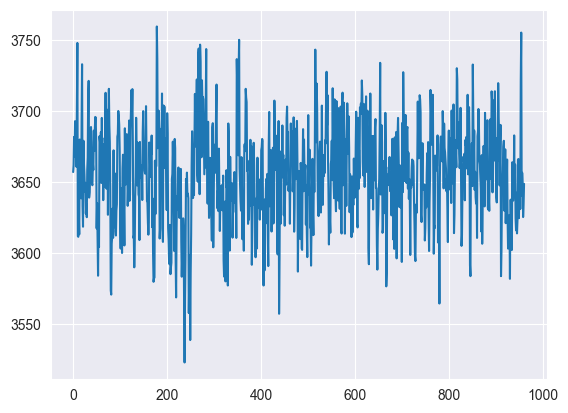

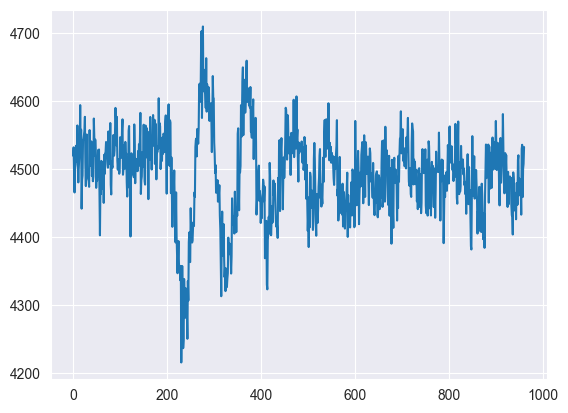

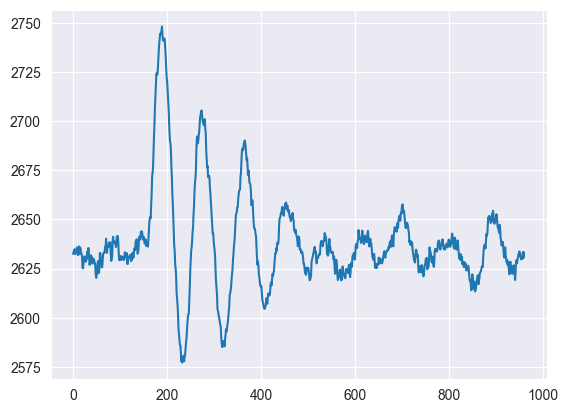

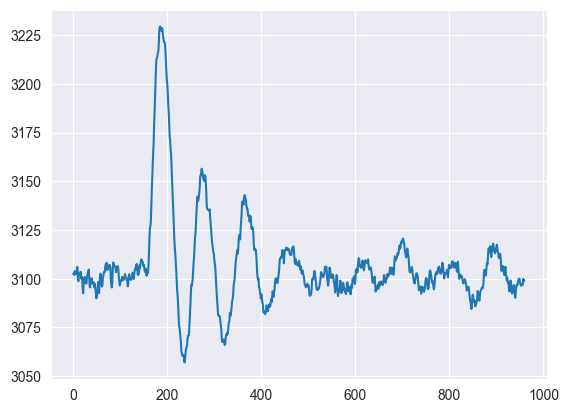

In [33]:
import pandas as pd

df = pd.DataFrame(np.vstack([np.sum(C, axis=0), [i for i in range(52)]]).T, columns=["values", "variables"])
df.sort_values(by=["values"], ascending=False, inplace=True)

print(df)

plt.plot(testdata[:, 1])
plt.show()

plt.plot(testdata[:, 2])
plt.show()

plt.plot(testdata[:, 12])
plt.show()

plt.plot(testdata[:, 15])
plt.show()